# Lab 8: Implementing K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset.shape

(200, 5)

In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
print(X[0:5,:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


### Using the elbow method to find the optimal number of clusters

C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


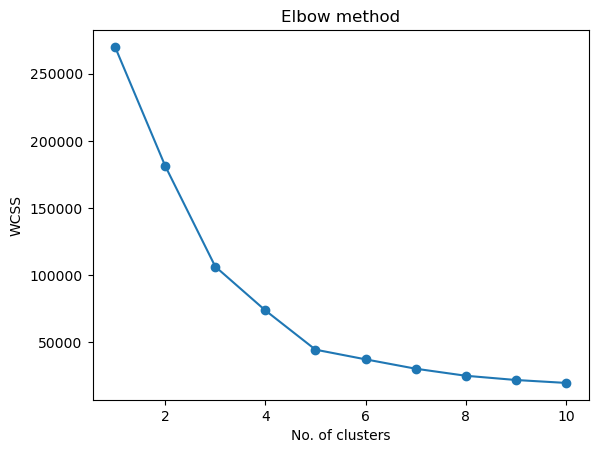

In [8]:
 from sklearn.cluster import KMeans
 wcss = []
 for i in range(1,11):
   kmeans = KMeans(n_clusters= i, init='k-means++',random_state= 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker='o')
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters= 5, 
                init='k-means++',
                random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

## Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit()

In [10]:
# The lowest SSE value
kmeans.inertia_

44448.45544793371

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

3

In [13]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Creating Output labels for Generating Graph

In [14]:
y_kmeans = kmeans.fit_predict(X)

In [15]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [16]:
# accuracy_score

from sklearn.metrics import accuracy_score
print(accuracy_score(kmeans.labels_,y_kmeans))

1.0


In [17]:
# homogeneity_score

from sklearn.metrics import homogeneity_score
print(homogeneity_score(kmeans.labels_ , y_kmeans))

1.0


## Visualising the clusters

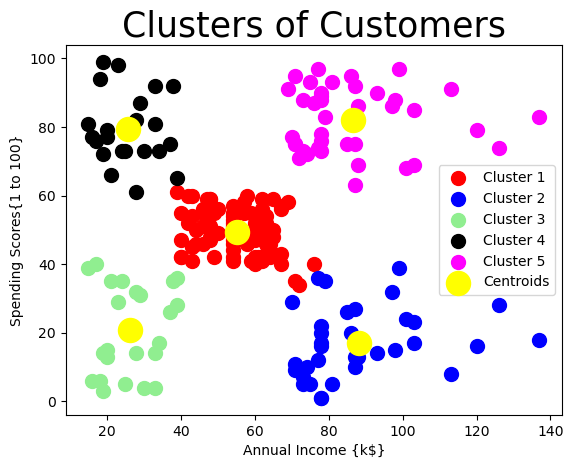

In [18]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100, c = 'red', label ="Cluster 1")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100, c = 'blue', label ="Cluster 2")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100, c = 'lightgreen', label ="Cluster 3")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100, c = 'black', label ="Cluster 4")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100, c = 'magenta', label ="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'Yellow',label = 'Centroids')
plt.title("Clusters of Customers",size = 25)
plt.xlabel("Annual Income {k$}")
plt.ylabel("Spending Scores{1 to 100}")
plt.legend()
plt.show()

## New Model

C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


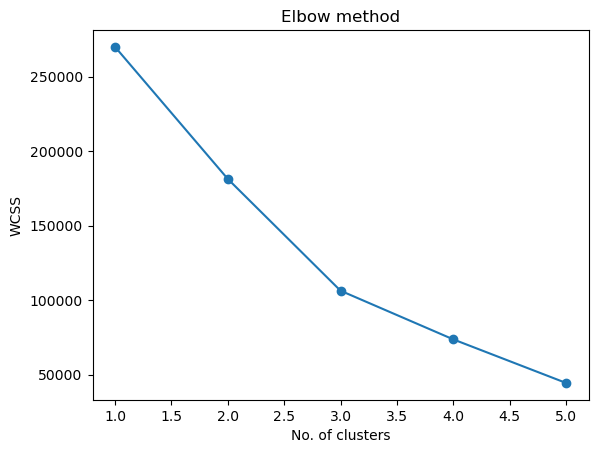

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i,
                    init='random', 
                    n_init=12, 
                    max_iter=150, 
                    tol=0.00001, 
                    random_state=3)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss, marker='o')
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()


In [20]:
kmeans1 = KMeans(n_clusters=i,
                    init='random', 
                    n_init=12, 
                    max_iter=150, 
                    tol=0.00001, 
                    random_state=3)
kmeans1.fit(X)

KMeans(init='random', max_iter=150, n_clusters=5, n_init=12, random_state=3,
       tol=1e-05)

In [21]:
# The lowest SSE value
kmeans1.inertia_

44448.45544793371

In [22]:
# Final locations of the centroid
print(kmeans1.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


In [23]:
# The number of iterations required to converge
kmeans1.n_iter_

8

In [24]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_
kmeans1.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [25]:
y_kmeans1 = kmeans1.fit_predict(X)

In [26]:
print(y_kmeans1)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [27]:
# accuracy_score

from sklearn.metrics import accuracy_score
print(accuracy_score(kmeans1.labels_,y_kmeans1))

1.0


In [28]:
# homogeneity_score

from sklearn.metrics import homogeneity_score
print(homogeneity_score(kmeans1.labels_ , y_kmeans1))

1.0
